# Dimensionality Reduction with PCA and kPCA


In this notebook we will go through steps of principle component analysis (PCA) and kernel PCA (kPCA) using sklearn. FOr each method, we first use toy datasets of sklearn. Then we use the MINST dataset to see how the methods work on real data.

In [62]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn import datasets

## PCA with IRIS dataset
For this part some contents of ( ) are used.

Load the data and normalize it:

In [5]:
iris = datasets.load_iris()
X = iris.data # data of 150 observations with 4 features
y = iris.target
features = iris.feature_names
plant_type = iris.target_names
# standardize the features
x_std = StandardScaler().fit_transform(X)
print('number of observations = %d\n' %(x_std.shape[0]))
print('number of features = %d\n' %(x_std.shape[1]))

number of observations = 150

number of features = 4



Let's look at the covariance matrix of the features:

Text(0.5, 1.05, 'Covariance matrix of the features')

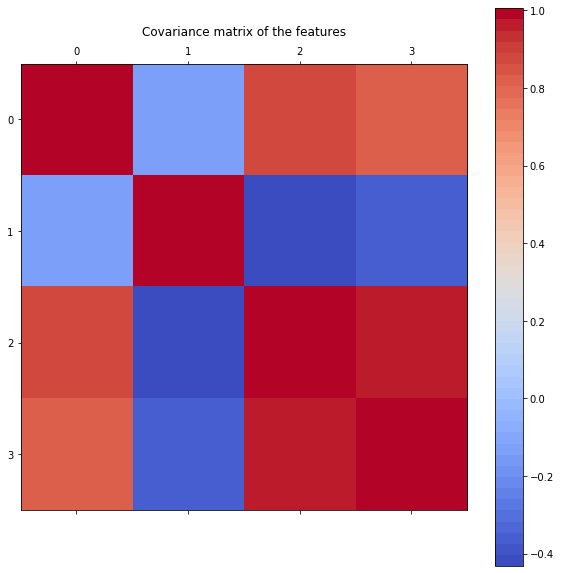

In [17]:
cov_mat = np.cov(x_std.T)
plt.figure(figsize=(10,10))
cmap = cm.get_cmap('coolwarm', 50)
plt.matshow(cov_mat, cmap=cmap, fignum=1)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Covariance matrix of the features before PCA')

Many of features have correlation to each other. To compress data and extract orthogonal components which explain the most variance, we use PCA:

In [63]:
pca_iris = PCA()
x_pca = pca_iris.fit_transform(X_std)

some usefull methods:


* pca_iris.fit(x) fits the transform on x

* pca_iris.fit_transform(x) transormfs x in addition to fitting

* pca_iris.transform(x) applies the computed tranform on x.

* pca_iris = sklearnPCA(n_components=0.9): if you are interested in selecting components based on variance explained.
* loading_sklearn = pca_iris.components_ : gives the loadings
* X_back = pca_iris.inverse_transform(Y_sklearn): applies the inverse transform on 


Let's look at the covariance matrix after the transformation, we expect all the off-diagonal elements to be equal to zero (because PCA components are orthogonal).

Text(0.5, 1.05, 'Covariance matrix of the features after PCA')

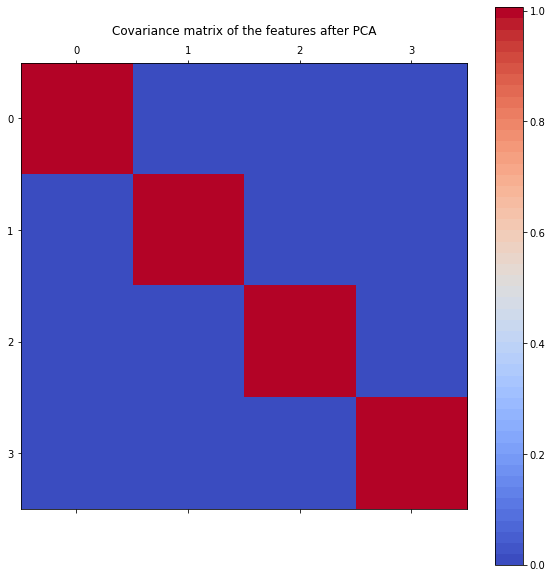

In [26]:
x_pca_std = StandardScaler().fit_transform(x_pca)
cov_mat = np.cov(x_pca_std.T)
plt.figure(figsize=(10,10))
cmap = cm.get_cmap('coolwarm', 50)
plt.matshow(cov_mat, cmap=cmap, fignum=1)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Covariance matrix of the features after PCA')

Now, let's look at the variance explained by the components

Text(0.5, 0, 'component')

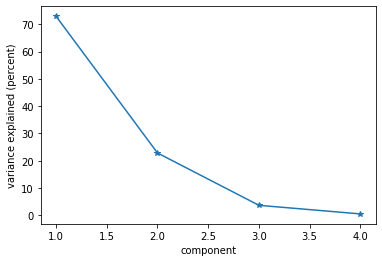

In [15]:
explained_var = sklearn_pca.explained_variance_ratio_
plt.figure()
plt.plot(np.arange(1,5), explained_var*100, '-*')
plt.ylabel('variance explained (percent)')
plt.xlabel('component')

We see that the first compoentns explain the most variance and the last component explains the least. 
For dimensionality reduction, the practice is to keep the components as many as a desired explained variance is kept.

## PCA with MNIST dataset
for this part, some contents of (https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60) are used.

In many cases, PCA is used as a tool for effective compression of data with the goal of reducing the complexity of data. In this part we use MNIST dataset (which is a set of hand written digits) to show how PCA can be used for extracting the features from the images. 

Load data and normaize:

In [32]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
data = mnist.data
target = mnist.target
data = StandardScaler().fit_transform(data)
print('number of observations = %d\n' %(data.shape[0]))
print('number of features = %d\n' %(data.shape[1]))

number of observations = 70000

number of features = 784



Apply PCA and keep 95% of variance:

In [64]:
pca_mnist_95 = PCA(0.95)
pca_mnist_85 = PCA(0.85)
data_pca_95 = pca_mnist_95.fit_transform(data)
data_pca_85 = pca_mnist_85.fit_transform(data)

print('%d components explain 95 perc of variance\n' %(data_pca_95.shape[1]))
print('%d components explain 85 perc of variance\n' %(data_pca_85.shape[1]))


332 components explain 95 perc of variance

186 components explain 85 perc of variance



We see that 332 (<<784) and 186 (<<<784) components explain 95% and 85% of variance respectively. Now let's look at the images after compresion:

For this purpose, we first project the compressed data back to its original space:

In [51]:
data_pca_back_95 = pca_mnist_95.inverse_transform(data_pca_95)
data_pca_back_85 = pca_mnist_85.inverse_transform(data_pca_85)

Now, we select a random image and plot the original and the compressed ones:

Text(0.5, 1.0, '85%')

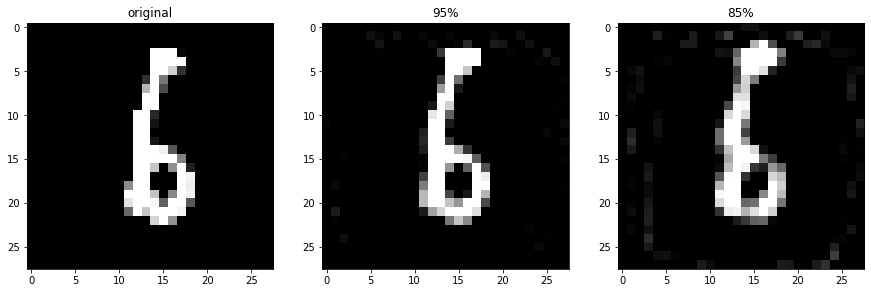

In [61]:
image_no = np.random.randint(data.shape[0]) # select a random image
plt.figure(figsize=(15, 15))
plt.subplot(131)
plt.imshow(data[image_no, :].reshape((28, 28)), cmap=plt.cm.gray, interpolation='nearest', clim=(0, 1))
plt.title('original')
plt.subplot(132)
plt.imshow(data_pca_back_95[image_no, :].reshape((28, 28)), cmap=plt.cm.gray, interpolation='nearest', clim=(0, 1))
plt.title('95%')
plt.subplot(133)
plt.imshow(data_pca_back_85[image_no, :].reshape((28, 28)), cmap=plt.cm.gray, interpolation='nearest', clim=(0, 1))
plt.title('85%')

## kPCA with doughnut
parts of (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html) are used.

We make a toy dataset, where we see that kPCA is able to "perceive" the structure of data and PCA is not able to do so.

Make a doughnut dataset:

Text(0, 0.5, '$x_2$')

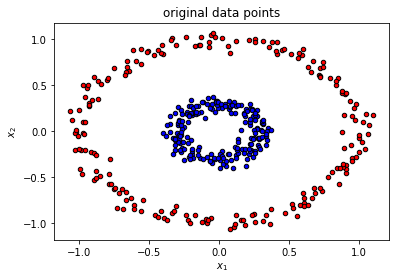

In [68]:
from sklearn.datasets import make_circles
x_d, y_d = make_circles(n_samples=400, factor=.3, noise=.05)

reds = y_d == 0
blues = y_d == 1

plt.figure()
plt.scatter(x_d[reds, 0], x_d[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(x_d[blues, 0], x_d[blues, 1], c="blue", s=20, edgecolor='k')
plt.title('original data points')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Apply kPCA and PCA:

In [77]:
kpca_d = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
x_d_kpca = kpca_d.fit_transform(x_d)
print('dimensions of the kpca projection = (%d, %d)' %(x_d_kpca.shape))

dimensions of the kpca projection = (400, 389)


We see that data is projected onto a higher dimensional space. Let's look at the first two components:

Text(0, 0.5, '2nd component')

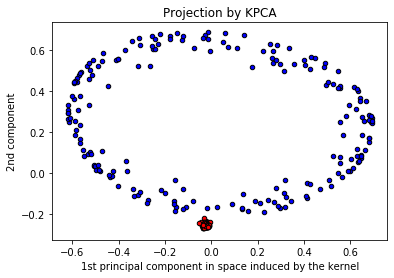

In [79]:
plt.figure()
plt.scatter(x_d_kpca[reds, 0], x_d_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(x_d_kpca[blues, 0], x_d_kpca[blues, 1], c="blue", s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by the kernel")
plt.ylabel("2nd component")

The two parts of the data are separated properly. What if we use PCA? Let's look at the first two PCA componentns.

Text(0, 0.5, '2nd component')

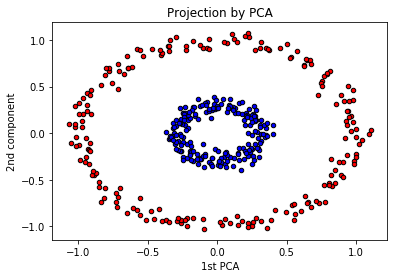

In [80]:
pca_d = PCA()
x_d_pca = pca_d.fit_transform(x_d)
plt.figure()
plt.scatter(x_d_pca[reds, 0], x_d_pca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(x_d_pca[blues, 0], x_d_pca[blues, 1], c="blue", s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel(r"1st PCA")
plt.ylabel("2nd component")

The data structure is not perceived by PCA.